In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 30_05_2022 09_48_25.xlsx')

In [5]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [6]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza',2:'Influenza'})

In [7]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [8]:
filtro = dados[['Sem Epi Internacao','Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]

In [9]:
base = filtro.groupby('Sem Epi Internacao').count()
base = base.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"])
base.head()

""
Sem Epi Internacao
2020_01
2020_02
2020_03
2020_04
2020_05


In [10]:
internadoInflu = filtro.loc[filtro['Internado UTI']=='Sim']
internadoInflu = internadoInflu.loc[internadoInflu['pos_pcrflu']=='Sim']
internadoInflu = internadoInflu.groupby('Sem Epi Internacao').count()
internadoInflu = internadoInflu.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pcr_vsr"])
internadoInflu.tail()

,pos_pcrflu
Sem Epi Internacao,
2022_30,1
2022_32,1
2022_42,1
2022_44,1
2022_45,1


In [11]:
internadoVSR = filtro.loc[filtro['Internado UTI']=='Sim']
internadoVSR = internadoVSR.loc[internadoVSR['pcr_vsr']==1]
internadoVSR = internadoVSR.groupby('Sem Epi Internacao').count()
internadoVSR = internadoVSR.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pos_pcrflu"])
internadoVSR.head()

,pcr_vsr
Sem Epi Internacao,
2020_20,1
2021_01,1
2021_05,1
2021_10,3
2021_11,2


In [12]:
internadoInfluVSR = pd.concat([internadoInflu,internadoVSR])
internadoInfluVSR = internadoInfluVSR.fillna(0)
internadoInfluVSR = internadoInfluVSR.reset_index()
internadoInfluVSR = internadoInfluVSR.sort_values(by='Sem Epi Internacao')
internadoInfluVSR = internadoInfluVSR.groupby('Sem Epi Internacao').sum()
internadoInfluVSR['Calculo'] = internadoInfluVSR['pos_pcrflu'] + internadoInfluVSR['pcr_vsr']
internadoInfluVSR = internadoInfluVSR.merge(base,how='outer',right_index=True,left_index=True)
internadoInfluVSR = internadoInfluVSR.drop('2022_39')
internadoInfluVSR = internadoInfluVSR.fillna(0)
internadoInfluVSR.tail()

,pos_pcrflu,pcr_vsr,Calculo
Sem Epi Internacao,,,
2022_42,1.0,3.0,4.0
2022_43,0.0,3.0,3.0
2022_44,1.0,3.0,4.0
2022_45,1.0,5.0,6.0
2022_46,0.0,0.0,0.0


In [13]:
internadoInfluVSR = internadoInfluVSR['Calculo']

In [14]:
suportVentInflu = filtro.loc[filtro['Suporte ventilatorio']=='Sim, invasivo']
suportVentInflu = suportVentInflu.loc[suportVentInflu['pos_pcrflu']=='Sim']
suportVentInflu = suportVentInflu.groupby('Sem Epi Internacao').count()
suportVentInflu = suportVentInflu.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pcr_vsr"])
suportVentInflu.tail()

,pos_pcrflu
Sem Epi Internacao,
2022_26,6
2022_27,1
2022_28,6
2022_40,1
2022_45,1


In [15]:
suportVentVSR = filtro.loc[filtro['Suporte ventilatorio']=='Sim, invasivo']
suportVentVSR = suportVentVSR.loc[suportVentVSR['pcr_vsr']==1]
suportVentVSR = suportVentVSR.groupby('Sem Epi Internacao').count()
suportVentVSR = suportVentVSR.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pos_pcrflu"])
suportVentVSR.tail(10)

,pcr_vsr
Sem Epi Internacao,
2022_34,2
2022_35,1
2022_37,3
2022_38,2
2022_39,1
2022_40,1
2022_41,1
2022_43,2
2022_44,3


In [16]:
suportVentInfluVSR = pd.concat([suportVentInflu,suportVentVSR])
suportVentInfluVSR = suportVentInfluVSR.fillna(0)
suportVentInfluVSR = suportVentInfluVSR.reset_index()
suportVentInfluVSR = suportVentInfluVSR.sort_values(by='Sem Epi Internacao')
suportVentInfluVSR = suportVentInfluVSR.groupby('Sem Epi Internacao').sum()
suportVentInfluVSR['Calculo'] = suportVentInfluVSR['pos_pcrflu'] + suportVentInfluVSR['pcr_vsr']
suportVentInfluVSR = suportVentInfluVSR.merge(base,how='outer',right_index=True,left_index=True)
suportVentInfluVSR = suportVentInfluVSR.drop('2022_39')
suportVentInfluVSR = suportVentInfluVSR.fillna(0)
suportVentInfluVSR.tail(13)

,pos_pcrflu,pcr_vsr,Calculo
Sem Epi Internacao,,,
2022_33,0.0,4.0,4.0
2022_34,0.0,2.0,2.0
2022_35,0.0,1.0,1.0
2022_36,0.0,0.0,0.0
2022_37,0.0,3.0,3.0
2022_38,0.0,2.0,2.0
2022_40,1.0,1.0,2.0
2022_41,0.0,1.0,1.0
2022_42,0.0,0.0,0.0


In [17]:
suportVentInfluVSR = suportVentInfluVSR['Calculo']
suportVentInfluVSR.head()

Sem Epi Internacao
2020_01    0.0
2020_02    0.0
2020_03    0.0
2020_04    1.0
2020_05    0.0
Name: Calculo, dtype: float64

In [18]:
houveInternInflu = filtro.loc[filtro['Houve internacao']=='Sim']
houveInternInflu = houveInternInflu.loc[houveInternInflu['pos_pcrflu']=='Sim']
houveInternInflu = houveInternInflu.groupby('Sem Epi Internacao').count()
houveInternInflu = houveInternInflu.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pcr_vsr"])
houveInternInflu.tail(10)

,pos_pcrflu
Sem Epi Internacao,
2022_28,11
2022_29,2
2022_30,4
2022_31,4
2022_32,1
2022_40,1
2022_41,2
2022_42,4
2022_44,2


In [19]:
houveInternVSR = filtro.loc[filtro['Houve internacao']=='Sim']
houveInternVSR = houveInternVSR.loc[houveInternVSR['pcr_vsr']==1]
houveInternVSR = houveInternVSR.groupby('Sem Epi Internacao').count()
houveInternVSR = houveInternVSR.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pos_pcrflu"])
houveInternVSR.tail(10)

,pcr_vsr
Sem Epi Internacao,
2022_36,17
2022_37,11
2022_38,8
2022_39,8
2022_40,6
2022_41,5
2022_42,6
2022_43,7
2022_44,7


In [20]:
houveInternInfluVSR = pd.concat([houveInternInflu,houveInternVSR])
houveInternInfluVSR = houveInternInfluVSR.fillna(0)
houveInternInfluVSR = houveInternInfluVSR.reset_index()
houveInternInfluVSR = houveInternInfluVSR.sort_values(by='Sem Epi Internacao')
houveInternInfluVSR = houveInternInfluVSR.groupby('Sem Epi Internacao').sum()
houveInternInfluVSR['Calculo'] = houveInternInfluVSR['pos_pcrflu'] + houveInternInfluVSR['pcr_vsr']
houveInternInfluVSR = houveInternInfluVSR.merge(base,how='outer',right_index=True,left_index=True)
houveInternInfluVSR = houveInternInfluVSR.drop('2022_39')
houveInternInfluVSR = houveInternInfluVSR.fillna(0)
houveInternInfluVSR.tail(10)

,pos_pcrflu,pcr_vsr,Calculo
Sem Epi Internacao,,,
2022_36,0.0,17.0,17.0
2022_37,0.0,11.0,11.0
2022_38,0.0,8.0,8.0
2022_40,1.0,6.0,7.0
2022_41,2.0,5.0,7.0
2022_42,4.0,6.0,10.0
2022_43,0.0,7.0,7.0
2022_44,2.0,7.0,9.0
2022_45,2.0,7.0,9.0


In [21]:
houveInternInfluVSR = houveInternInfluVSR['Calculo']

In [22]:
semana = internadoInfluVSR.reset_index()
semana = semana['Sem Epi Internacao']

In [23]:
np.size(internadoInfluVSR)

150

In [24]:
legenda = ['Hospitalizados','UTI','Suporte Ventilatório Invasivo']

In [25]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

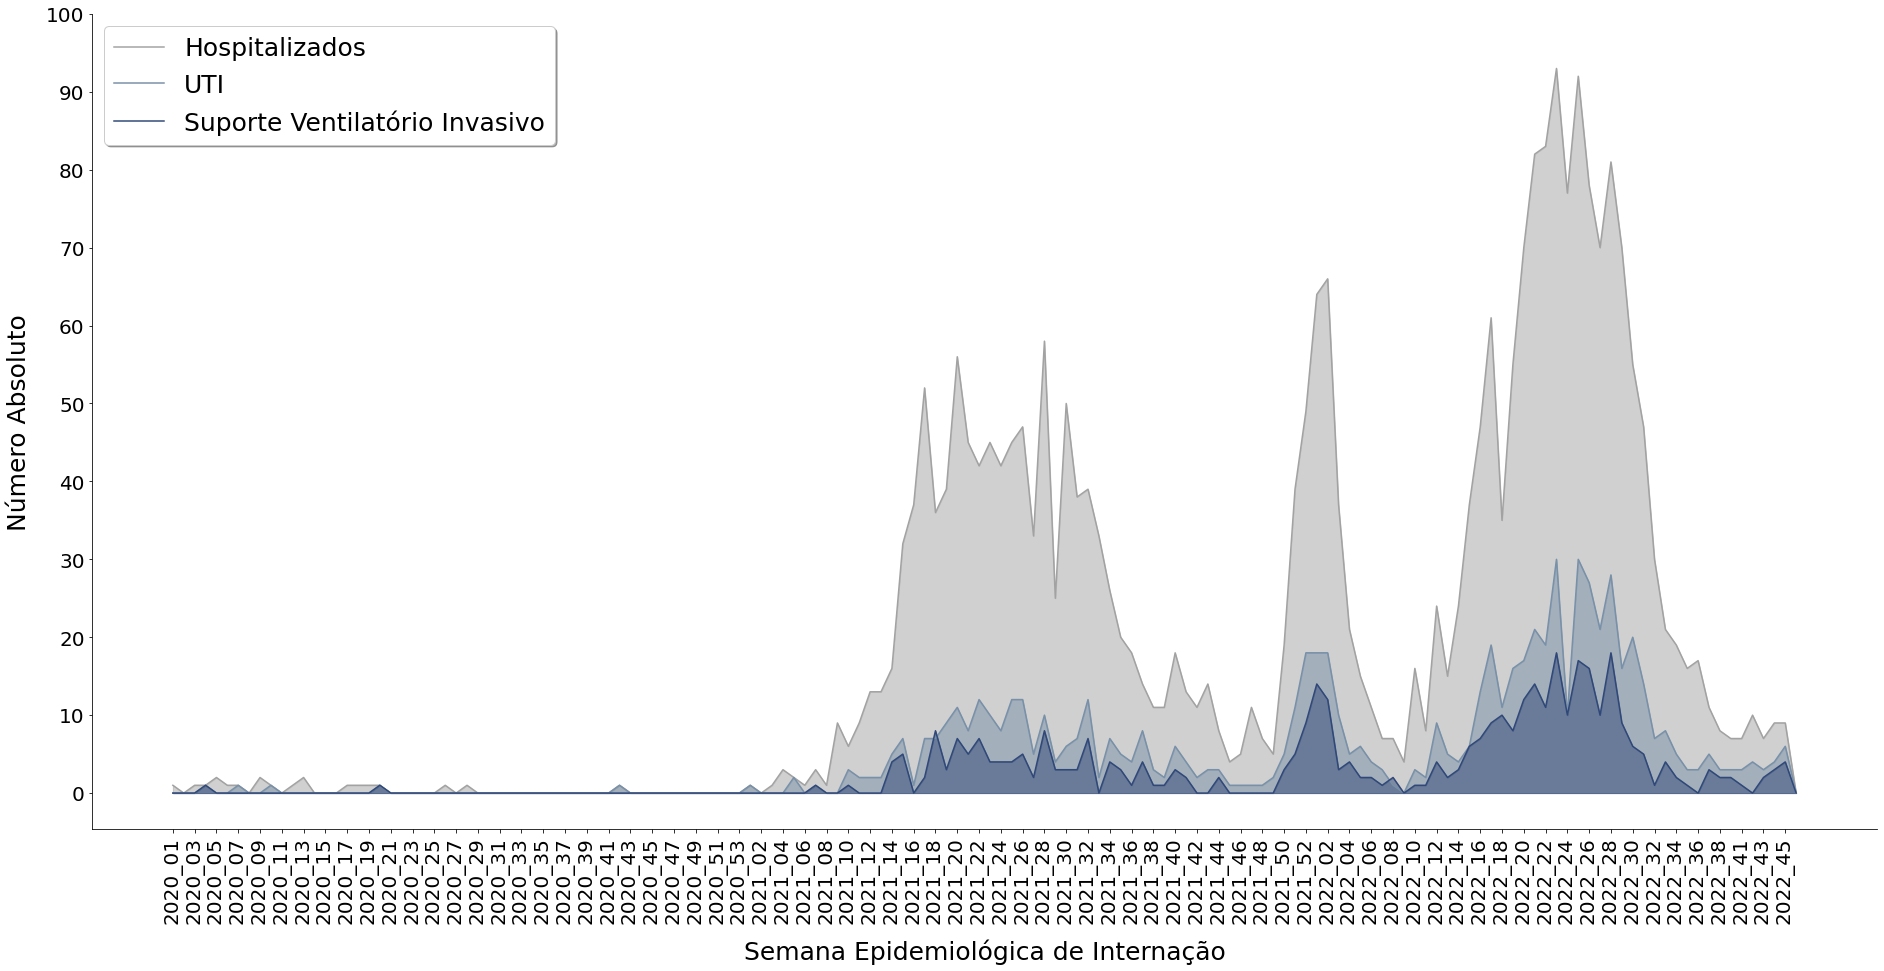

In [26]:
plt.figure(figsize=(32,15))
plt.plot(semana,houveInternInfluVSR,color='#a3a2a2')
plt.plot(semana,internadoInfluVSR,color='#7890a8')
plt.plot(semana,suportVentInfluVSR,color='#304878')
plt.fill_between(semana,houveInternInfluVSR,alpha=0.5,color='#a3a2a2')
plt.fill_between(semana,internadoInfluVSR,alpha=0.5,color='#7890a8')
plt.fill_between(semana,suportVentInfluVSR,alpha=0.5,color='#304878')
plt.xticks(np.arange(0,np.size(semana),2),fontsize=20, rotation=90)
plt.yticks(np.arange(0,110,10),fontsize=20)
plt.xlabel('Semana Epidemiológica de Internação',fontsize=25,labelpad=15)
plt.ylabel('Número Absoluto', fontsize=25, labelpad=15)
plt.legend(legenda, fontsize=25, shadow = True)
sns.despine()
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/hospUTISuport_InfluVSR.png',dpi=320,bbox_inches='tight')